# Problem Statement
## Impact of Medication for Lifestyle Diseases on Hospital Readmission-
Management of lifestyle diseases in hospitalized patients has a significant bearing on outcome,in terms of both morbidity and mortality.
The main objective for this problem is to predict whether a  patient is likely to be readmitted to hospital based on the previous details of the patient.

In [1]:
## import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [2]:
# read the data
Readmission = pd.read_csv("hospital_readmission.csv")

In [3]:
#Total number of rows
len(Readmission)

66587

In [4]:
# Shape of data
Readmission.shape

(66587, 49)

In [5]:
# Summary of data types and length of each columns
Readmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [6]:
# Head and tail of data
Readmission.head(5)

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [7]:
Readmission.tail(5)

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0
66586,51312,153167502,81985473,Caucasian,Female,[80-90),?,2,?,38,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [8]:
# data types of columns
Readmission.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [9]:
# Finding unique values in data
Readmission.nunique()

index                 48911
encounter_id          48911
patient_id            39650
race                      6
gender                    3
age                      10
weight                   10
time_in_hospital         14
medical_specialty        65
num_lab_procedures      113
num_procedures            7
num_medications          71
number_outpatient        33
number_emergency         26
number_inpatient         19
diag_1                  652
diag_2                  656
diag_3                  707
diag_4                  707
diag_5                48911
number_diagnoses         16
X1                        4
X2                        4
X3                        4
X4                        4
X5                        4
X6                        3
X7                        4
X8                        1
X9                        4
X10                       4
X11                       2
X12                       4
X13                       4
X14                       4
X15                 

<AxesSubplot:xlabel='readmitted'>

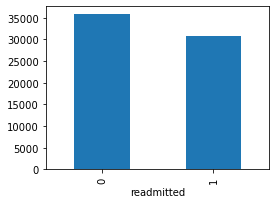

In [10]:
# Distribution of target variable
GroupedData=Readmission.groupby('readmitted').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [11]:
# percentage distribution of categories of target column
(Readmission['readmitted'].value_counts()/len(Readmission))*100

0    53.79879
1    46.20121
Name: readmitted, dtype: float64

From above it is visible that, the 'readmitted' column is mostly evenly distributed across the categories

## Exploratory data analysis

### Summary statistics

In [12]:
Readmission.describe(include = 'all')

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,66587,66587,66587,66587,66587.000000,66587,66587.000000,...,66587,66587,66587,66587,66587,66587,66587,66587,66587,66587.000000
unique,NaN,NaN,NaN,6,3,10,10,NaN,65,NaN,...,1,4,4,2,2,2,1,2,2,NaN
top,NaN,NaN,NaN,Caucasian,Female,[70-80),?,NaN,?,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,NaN,NaN,NaN,49906,35973,17031,64454,NaN,32672,NaN,...,66587,31175,66110,66575,66586,66582,66587,35894,51205,NaN
mean,50903.474282,1.653153e+08,5.422970e+07,NaN,NaN,NaN,NaN,4.397510,NaN,43.115533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,NaN,NaN,NaN,NaN,2.980995,NaN,19.630417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498559
min,0.000000,1.573800e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,NaN,NaN,NaN,NaN,2.000000,NaN,31.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,NaN,NaN,NaN,NaN,4.000000,NaN,44.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,NaN,NaN,NaN,NaN,6.000000,NaN,57.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [13]:
#Check for missing values
for i in Readmission.columns:
    if(Readmission[i][Readmission[i]=='?'].count()!=0):
        print(i,Readmission[i][Readmission[i]=='?'].count())
        print("% of missing values",Readmission[i][Readmission[i]=='?'].count()/len(Readmission[i])*100)

race 1504
% of missing values 2.258699145478847
weight 64454
% of missing values 96.79667202306757
medical_specialty 32672
% of missing values 49.06663462838092
diag_1 15
% of missing values 0.02252691966900446
diag_2 231
% of missing values 0.3469145629026687
diag_3 954
% of missing values 1.4327120909486837
diag_4 954
% of missing values 1.4327120909486837


In [14]:
# Dropping off columns with >30% missing values
Readmission.drop(['weight','medical_specialty'],axis = 1,inplace = True)


In [15]:
# Replacing ? with blank
Readmission['diag_1'] = np.where(Readmission['diag_1']=='?','NA',Readmission['diag_1'])
Readmission['diag_2'] = np.where(Readmission['diag_2']=='?','NA',Readmission['diag_2'])

In [16]:
Readmission['diag_3'] = np.where(Readmission['diag_3']=='?','NA',Readmission['diag_3'])
Readmission['diag_4'] = np.where(Readmission['diag_4']=='?','NA',Readmission['diag_4'])
Readmission['race'] = np.where(Readmission['race']=='?','NA',Readmission['race'])

In [17]:
#Check for missing values again
for i in Readmission.columns:
    if(Readmission[i][Readmission[i]=='?'].count()!=0):
        print(i,Readmission[i][Readmission[i]=='?'].count())
        print("% of missing values",Readmission[i][Readmission[i]=='?'].count()/len(Readmission[i])*100)

In [18]:
Readmission.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5',
       'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

### Univariate analysis

In [19]:
# Segreggating numerical and categorical data based on number of unique values present within the column

num_cols = ['index', 'encounter_id', 'patient_id','num_lab_procedures','num_medications', 'number_outpatient',
                       'number_emergency',
                        'diag_5']
cat_cols = ['race', 'gender', 'age',
       'time_in_hospital','number_inpatient','number_diagnoses','diag_1', 'diag_2', 'diag_3', 'diag_4',
            'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed']

In [20]:
print(num_cols)

['index', 'encounter_id', 'patient_id', 'num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'diag_5']


Plotting histogram of numeric columns to see each one's distribution

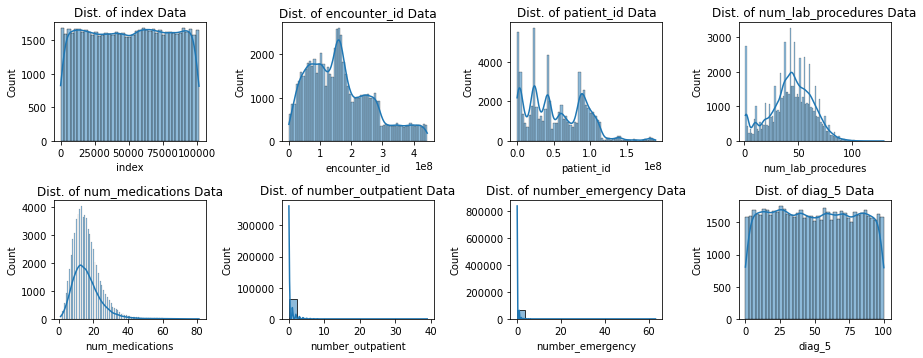

In [21]:
# Histogram interpretation
%matplotlib inline
plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace = 0.5,hspace=0.5)

for i,j in enumerate(num_cols):
        plt.subplot(4,4,i+1)
        plt.title(f"Dist. of {j} Data")
        sns.histplot(Readmission[j],kde = True)   

In [22]:
# Removing skewness from highly skewed columns
skew_cols = ['encounter_id', 'patient_id', 'num_lab_procedures', 
             'num_medications', 'number_outpatient', 'number_emergency']

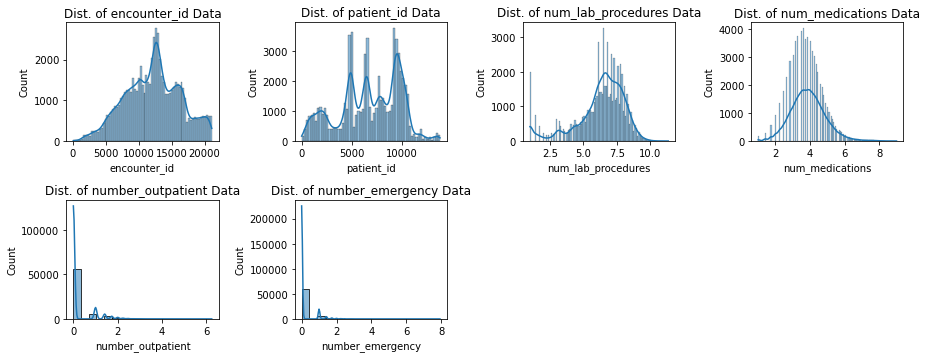

In [23]:
# Applying square-root on each skewed columns and check distribution afterwards
plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace = 0.5,hspace=0.5)
from scipy.stats import boxcox

for i,col in enumerate(skew_cols):
    Readmission[col] = np.sqrt(Readmission[col])
    plt.subplot(4,4,i+1)
    plt.title(f"Dist. of {col} Data")
    sns.histplot(Readmission[col],kde = True) 

From above histogram, we can infer there are still skewness in given columns which is caused due to presence outliers. Hence need to proceed for outlier treatment.

In [24]:
box_cols = ['index', 'encounter_id', 'patient_id', 'num_lab_procedures', 'num_medications', 'number_outpatient', 
            'number_emergency', 'diag_5']

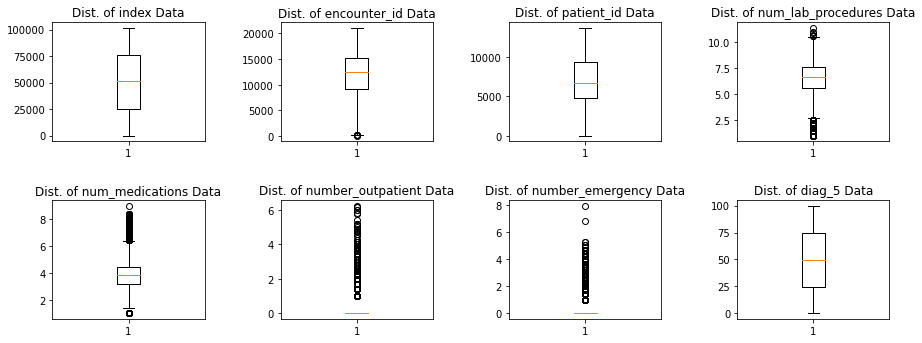

In [25]:
# Box-plot interpretation to check for outliers
plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace = 0.5,hspace=0.5)

for i,col in enumerate(box_cols):
        plt.subplot(4,4,i+1)
        plt.title(f"Dist. of {col} Data")
        plt.boxplot(Readmission[col])   

In [26]:
# checking individual variance of 'number_outpatient', 'number_emergency' columns as both are containing 
#large number of outliers
from statistics import variance
print(variance(Readmission['number_outpatient']))
print(variance(Readmission['number_emergency']))

0.31308487631343834
0.18082820317869652


#### From above we can see that 'number_outpatient', 'number_emergency' both the columns are having low variance (~0) so it can create misleading insights out of the data and cannot generate any new information , hence decided to drop those.

In [27]:
# Droping off clumns with high outliers 
Readmission.drop(['number_outpatient', 'number_emergency'],axis = 1,inplace = True)

In [28]:
# Finding outliers in remaining  numerical columns with large outliers
outlier_cols = ['num_lab_procedures', 'num_medications']

for i in outlier_cols:
    # IQR
    Q1 = np.percentile(Readmission[i], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(Readmission[i], 75,
                   interpolation = 'midpoint')

    IQR = Q3-Q1
    print (f"Outlier check for {i}",Q3,Q1,IQR)
    print("Old Shape: ", Readmission.shape)

    # Upper bound
    upper = Q3+1.5*IQR
   # Lower bound
    lower = Q1-1.5*IQR
    
    print("Upper bound:",upper,"Lower bound:",lower)

Outlier check for num_lab_procedures 7.54983443527075 5.5677643628300215 1.9820700724407283
Old Shape:  (66587, 45)
Upper bound: 10.522939543931843 Lower bound: 2.594659254168929
Outlier check for num_medications 4.47213595499958 3.1622776601683795 1.3098582948312
Old Shape:  (66587, 45)
Upper bound: 6.43692339724638 Lower bound: 1.1974902179215794


In [29]:
# Finding out outliers in given columns and replacing them with values as 90% of upper and lower limit
Readmission['num_lab_procedures'][Readmission['num_lab_procedures']<10.52].sort_values(ascending = False)

25412    10.440307
9943     10.440307
57695    10.440307
29768    10.392305
26939    10.392305
           ...    
20734     1.000000
61914     1.000000
65198     1.000000
16253     1.000000
31476     1.000000
Name: num_lab_procedures, Length: 66581, dtype: float64

In [30]:
Readmission['num_lab_procedures'][Readmission['num_lab_procedures']>2.59].sort_values(ascending = True)

39904     2.645751
26913     2.645751
31374     2.645751
10061     2.645751
8664      2.645751
           ...    
66012    10.535654
46335    10.630146
40541    10.862780
11902    10.954451
43777    11.357817
Name: num_lab_procedures, Length: 62817, dtype: float64

In [31]:
Readmission['num_medications'][Readmission['num_medications']>1.19].sort_values(ascending = True)

24830    1.414214
53925    1.414214
19214    1.414214
8428     1.414214
39125    1.414214
           ...   
8136     8.366600
44483    8.366600
30191    8.366600
49071    8.366600
12778    9.000000
Name: num_medications, Length: 66406, dtype: float64

In [32]:
Readmission['num_medications'][Readmission['num_medications']<6.43].sort_values(ascending = False)

18829    6.403124
40177    6.403124
62561    6.403124
49484    6.403124
30844    6.403124
           ...   
26773    1.000000
64191    1.000000
56767    1.000000
47160    1.000000
3000     1.000000
Name: num_medications, Length: 65813, dtype: float64

In [33]:
Readmission['num_medications'][Readmission['num_medications']<1.19] = 1.414
Readmission['num_medications'][Readmission['num_medications']>6.43] = 6.40
Readmission['num_lab_procedures'][Readmission['num_lab_procedures']<2.59] = 2.64
Readmission['num_lab_procedures'][Readmission['num_lab_procedures']>10.52] = 10.44

C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_14644\916911384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Readmission['num_medications'][Readmission['num_medications']<1.19] = 1.414
C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_14644\916911384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Readmission['num_medications'][Readmission['num_medications']>6.43] = 6.40
C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_14644\916911384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

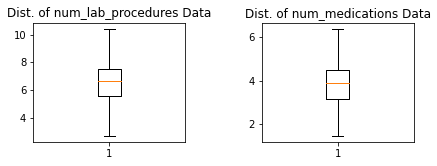

In [34]:
# Box-plot interpretation after outlier treatment
plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace= 0.5,hspace=0.5)

for i,col in enumerate(outlier_cols):
        plt.subplot(4,4,i+1)
        plt.title(f"Dist. of {col} Data")
        plt.boxplot(Readmission[col]) 

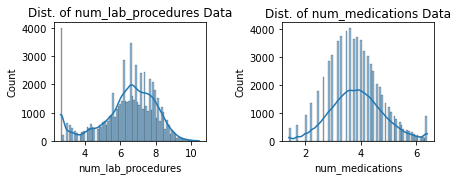

In [35]:
# Histogram interpretation after outlier treatment
%matplotlib inline
plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace = 0.5,hspace=0.5)

for i,j in enumerate(outlier_cols):
        plt.subplot(4,4,i+1)
        plt.title(f"Dist. of {j} Data")
        sns.histplot(Readmission[j],kde = True)  

Univariate analysis on categorical columns

In [36]:
cat_cols

['race',
 'gender',
 'age',
 'time_in_hospital',
 'number_inpatient',
 'number_diagnoses',
 'diag_1',
 'diag_2',
 'diag_3',
 'diag_4',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'change',
 'diabetesMed']

In [37]:
# Cheecking for distribution of individual categorical columns using countplot
cat_plot_1 = Readmission[['race', 'gender', 'age','time_in_hospital']]
cat_plot_2 = Readmission[['change', 'diabetesMed','number_inpatient','number_diagnoses']]
cat_plot_3 = Readmission[['X1','X2', 'X3', 'X4']]
cat_plot_4 = Readmission[['diag_1','diag_2','diag_3','diag_4']]

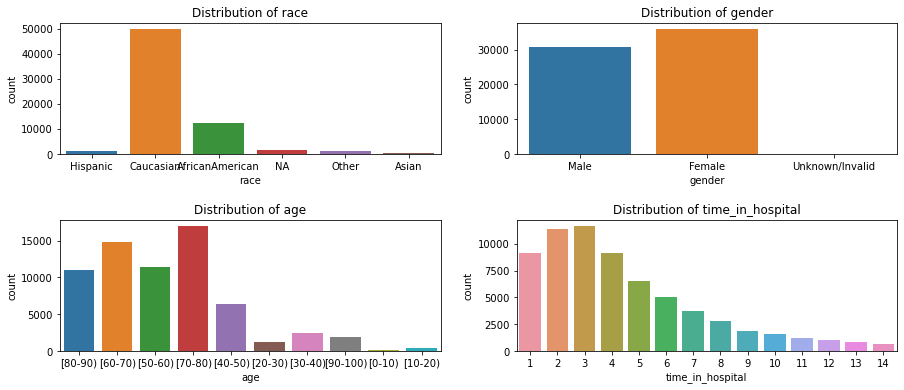

In [38]:
fig = plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.5)

for i,j in enumerate(cat_plot_1):
        ax = fig.add_subplot(2,2,i+1)
        sns.countplot(x = cat_plot_1[j],ax=ax)
        ax.set_title(f"Distribution of {j}")
        spacing = 0.5
        fig.subplots_adjust(bottom = spacing)

In [39]:
# Treating categorical columns with large number of categories
# Removing or regrouping categories with smaller conribution within the columns
Readmission['age'][Readmission['age']=='[0-10)'] = '[0-40)'
Readmission['age'][Readmission['age']=='[10-20)'] = '[0-40)'
Readmission['age'][Readmission['age']=='[20-30)'] = '[0-40)'
Readmission['age'][Readmission['age']=='[30-40)'] = '[0-40)'

C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_8880\3136699620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Readmission['age'][Readmission['age']=='[0-10)'] = '[0-40)'
C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_8880\3136699620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Readmission['age'][Readmission['age']=='[10-20)'] = '[0-40)'
C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_8880\3136699620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

C:\Users\HIMADRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

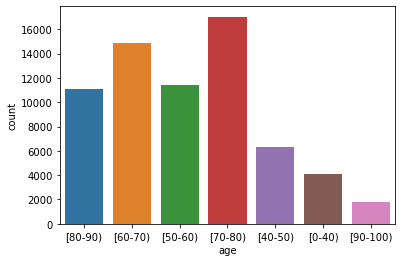

In [40]:
# Checking distribution after regrouping
sns.countplot(Readmission['age'])

In [41]:
# Following above methodlogy for all column with large categories
Readmission['time_in_hospital'][Readmission['time_in_hospital']>7] = 8

C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_8880\2735506770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Readmission['time_in_hospital'][Readmission['time_in_hospital']>7] = 8


C:\Users\HIMADRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_in_hospital', ylabel='count'>

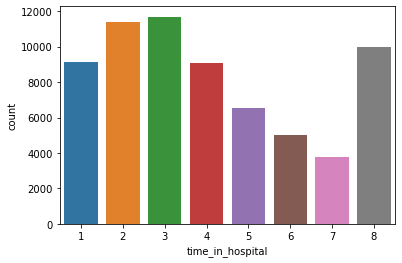

In [42]:
sns.countplot(Readmission['time_in_hospital'])

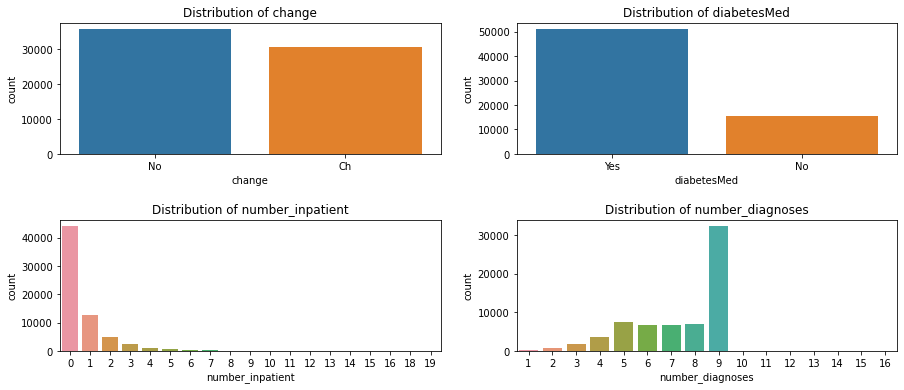

In [43]:
fig = plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.5)

for i,j in enumerate(cat_plot_2):
        ax = fig.add_subplot(2,2,i+1)
        sns.countplot(x = cat_plot_2[j],ax=ax)
        ax.set_title(f"Distribution of {j}")
        spacing = 0.5
        fig.subplots_adjust(bottom=spacing)

C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_8880\4099852124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Readmission['number_inpatient'][Readmission['number_inpatient']>1] = 2
C:\Users\HIMADRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_inpatient', ylabel='count'>

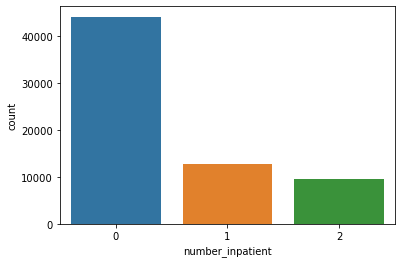

In [44]:
Readmission['number_inpatient'][Readmission['number_inpatient']>1] = 2
sns.countplot(Readmission['number_inpatient'])

C:\Users\HIMADRI\AppData\Local\Temp\ipykernel_8880\525927045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Readmission['number_diagnoses'][Readmission['number_diagnoses']>9] = 10
C:\Users\HIMADRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_diagnoses', ylabel='count'>

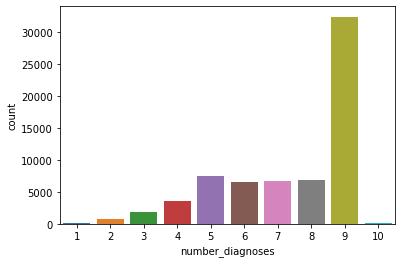

In [45]:
Readmission['number_diagnoses'][Readmission['number_diagnoses']>9] = 10
sns.countplot(Readmission['number_diagnoses'])

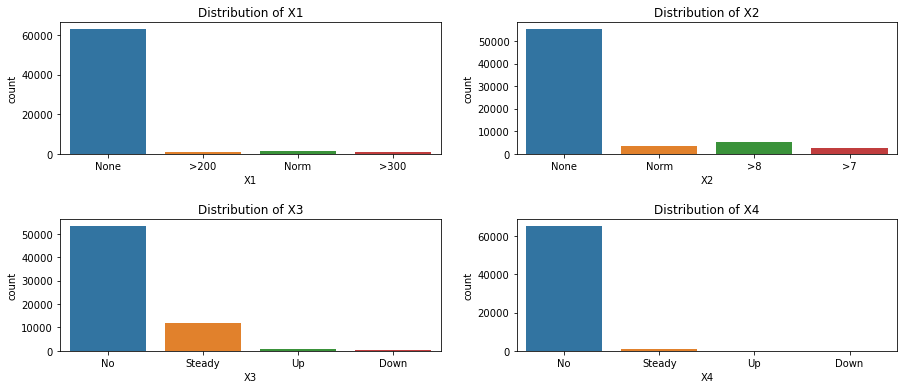

In [46]:
fig = plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.5)

for i,j in enumerate(cat_plot_3):
        ax = fig.add_subplot(2,2,i+1)
        sns.countplot(x = cat_plot_3[j],ax=ax)
        ax.set_title(f"Distribution of {j}")
        spacing = 0.5
        fig.subplots_adjust(bottom=spacing)

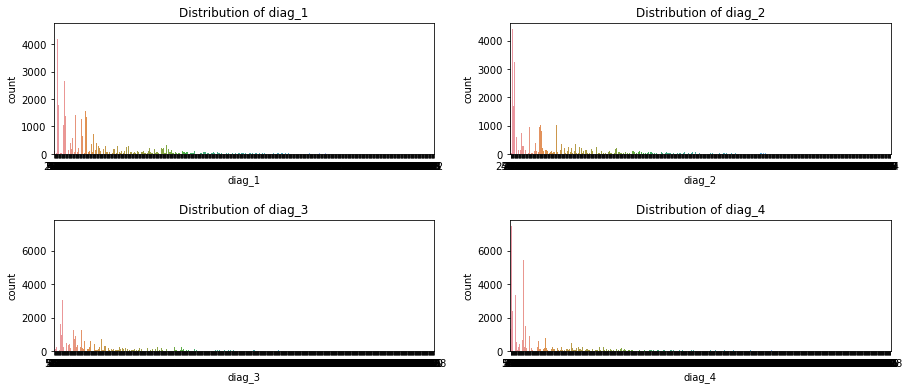

In [47]:
fig = plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.5)

for i,j in enumerate(cat_plot_4):
        ax = fig.add_subplot(2,2,i+1)
        sns.countplot(x = cat_plot_4[j],ax=ax)
        ax.set_title(f"Distribution of {j}")
        spacing = 0.5
        fig.subplots_adjust(bottom=spacing)

### Bi-variate Analysis

In [48]:
Readmission.dtypes

index                   int64
encounter_id          float64
patient_id            float64
race                   object
gender                 object
age                    object
time_in_hospital        int64
num_lab_procedures    float64
num_procedures          int64
num_medications       float64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13                    object
X14                    object
X15                    object
X16                    object
X17       

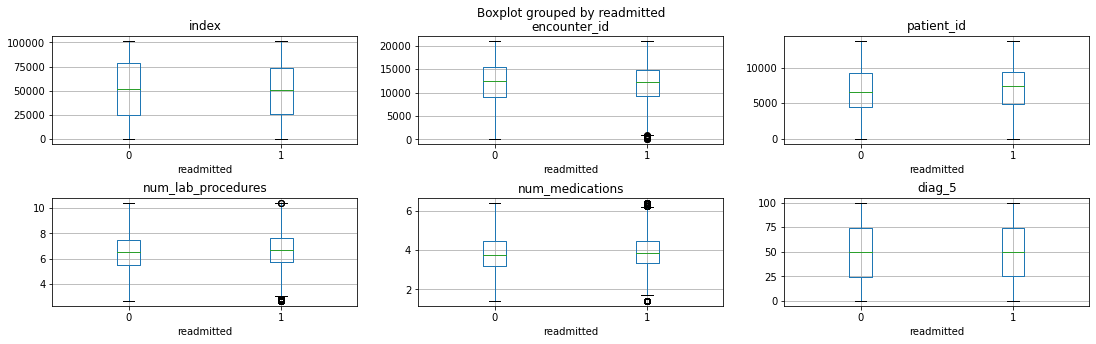

In [49]:
#Relationship exploration: Categorical dependent Vs Continuous Independent-- Box Plots
num_cols=['index',
 'encounter_id',
 'patient_id',
 'num_lab_procedures',
 'num_medications',
 'diag_5']

fig = plt.figure(figsize=(18,5))
plt.subplots_adjust(wspace = 0.8,hspace = 0.5)

# Creating box plots for each continuous predictor against the Target Variable "readmitted"
for PredictorCol , i in zip(num_cols, range(len(num_cols))):
    PlotCanvas=fig.add_subplot(2, 3, i+1)
    Readmission.boxplot(column=PredictorCol, by='readmitted', figsize=(5,5), vert=True, ax=PlotCanvas)

We will now perform Anova test to validate above box plots statiscally

Hypothesis of Annova test -

H0: There is no relation between continuous predictors and categoical target vaiables


H1: There is relation between continuous predictors and categoical target variables

If p-value > 0.5 we will be failing to reject H0 or else we will be rejecting H0.

In [50]:
# Defining a function to perform the Anova test 
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [51]:
num_cols = ['index',
 'encounter_id',
 'patient_id',
 'num_lab_procedures',
 'num_medications',
 'diag_5']

FunctionAnova(inpData=Readmission, TargetVariable='readmitted', ContinuousPredictorList=num_cols)

##### ANOVA Results ##### 

index is correlated with readmitted | P-Value: 8.31658872082449e-08
encounter_id is correlated with readmitted | P-Value: 1.594112556675249e-14
patient_id is correlated with readmitted | P-Value: 3.586418266057047e-90
num_lab_procedures is correlated with readmitted | P-Value: 3.9288595071869727e-20
num_medications is correlated with readmitted | P-Value: 5.0518666414814215e-67
diag_5 is NOT correlated with readmitted | P-Value: 0.42216825414946757


['index',
 'encounter_id',
 'patient_id',
 'num_lab_procedures',
 'num_medications']

#### Final selected continuous predictors:
'index',
 'encounter_id',
 'patient_id',
 'num_lab_procedures',
 'num_medications'

In [52]:
cat_cols

['race',
 'gender',
 'age',
 'time_in_hospital',
 'number_inpatient',
 'number_diagnoses',
 'diag_1',
 'diag_2',
 'diag_3',
 'diag_4',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'change',
 'diabetesMed']

In [53]:
#Relationship exploration: Categorical dependent Vs Categorical Independent-- Cross Tab
CrossTabResult=pd.crosstab(index=Readmission['gender'], columns=Readmission['readmitted'])
CrossTabResult

readmitted,0,1
gender,,
Female,19119,16854
Male,16702,13910
Unknown/Invalid,2,0


<Figure size 432x288 with 0 Axes>

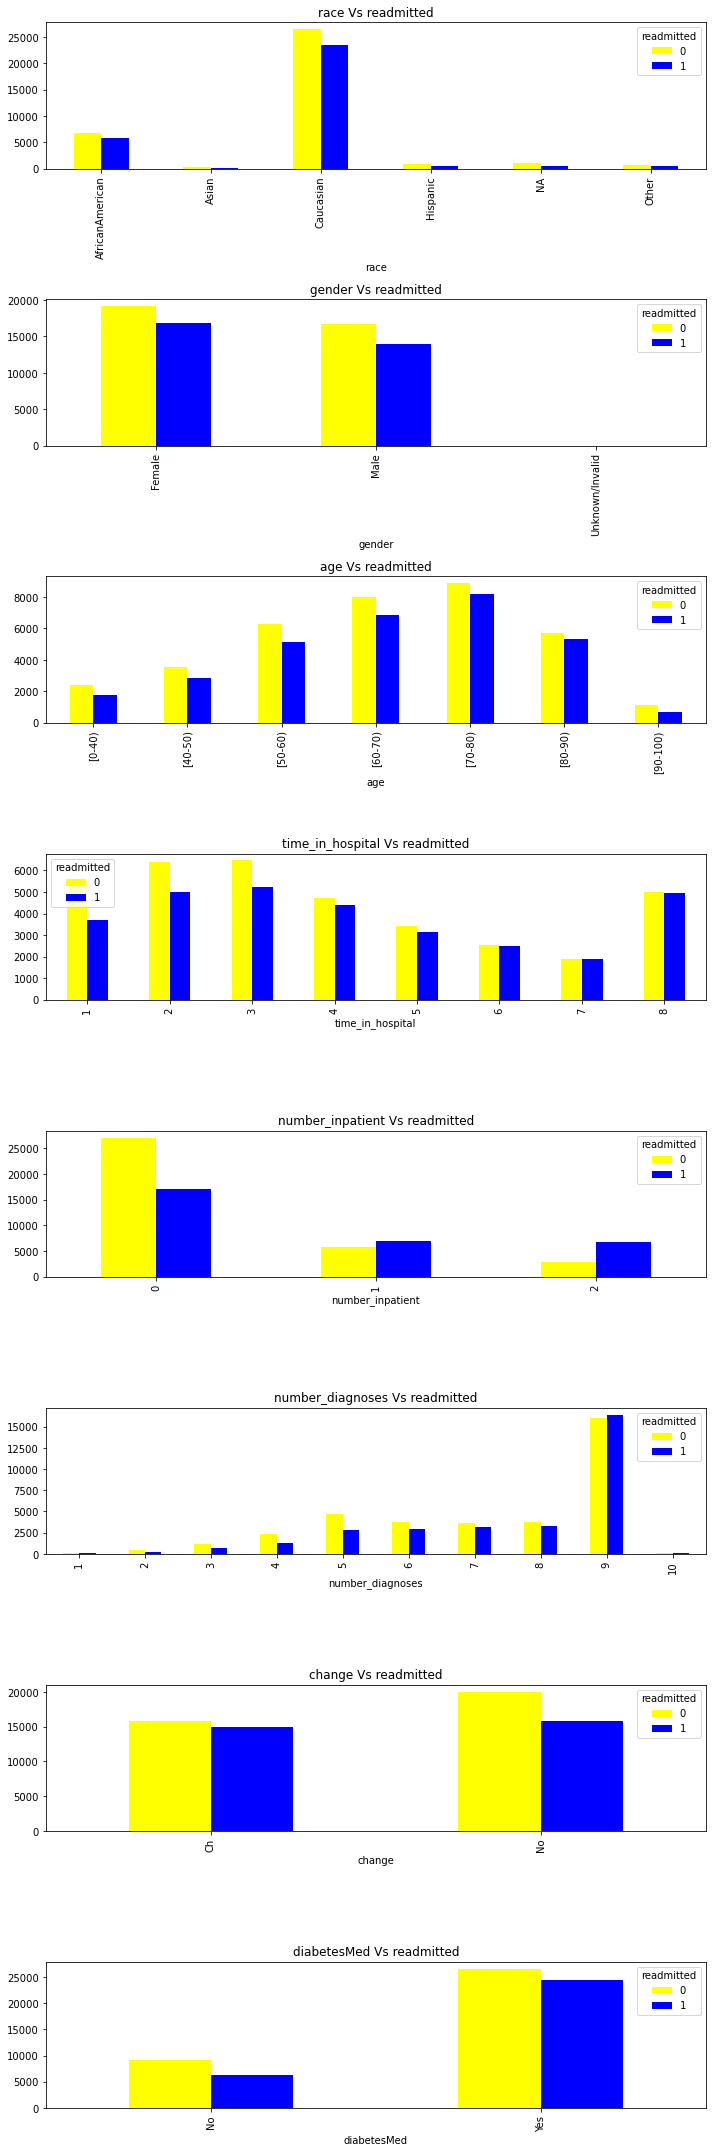

In [54]:
# Visual Inference using Grouped Bar charts
CategoricalColsList = ['race',
 'gender',
 'age',
 'time_in_hospital',
 'number_inpatient',
 'number_diagnoses','change',
 'diabetesMed'
 ]

plt.subplots_adjust(wspace = 0.8,hspace = 0.5)
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

#Creating Grouped bar plots for each categorical predictor against the Target Variable 'readmitted'
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=Readmission[PredictorCol], columns=Readmission['readmitted'])
    CrossTabResult.plot.bar(color=['yellow','blue'], ax=PlotCanvas[i], title=PredictorCol+' Vs '+'readmitted')
    fig.tight_layout()

We will perform chi-sq test to validate the visualization we have seen above through grouped bar plots

Hypothesis of Chi-sq test -

H0: There is no relation between continuous predictors and categoical target vaiables


H1: There is relation between continuous predictors and categoical target variables

If p-value > 0.5 we will be failing to reject H0 or else we will be rejecting H0.

In [55]:
# Writing a function to perform chi-sq test
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [56]:
CategoricalVariables=['race',
 'gender',
 'age',
 'time_in_hospital',
 'number_inpatient',
 'number_diagnoses','change',
 'diabetesMed']

# Calling the function
FunctionChisq(inpData=Readmission, 
              TargetVariable='readmitted',
              CategoricalVariablesList= CategoricalVariables)

race is correlated with readmitted | P-Value: 1.2217458997908937e-39
gender is correlated with readmitted | P-Value: 0.0005571054850718176
age is correlated with readmitted | P-Value: 2.724871858149014e-25
time_in_hospital is correlated with readmitted | P-Value: 6.459361952300565e-58
number_inpatient is correlated with readmitted | P-Value: 0.0
number_diagnoses is correlated with readmitted | P-Value: 1.6531848676141937e-170
change is correlated with readmitted | P-Value: 5.848666449347976e-31
diabetesMed is correlated with readmitted | P-Value: 5.0092099040737555e-62


['race',
 'gender',
 'age',
 'time_in_hospital',
 'number_inpatient',
 'number_diagnoses',
 'change',
 'diabetesMed']

<Figure size 432x288 with 0 Axes>

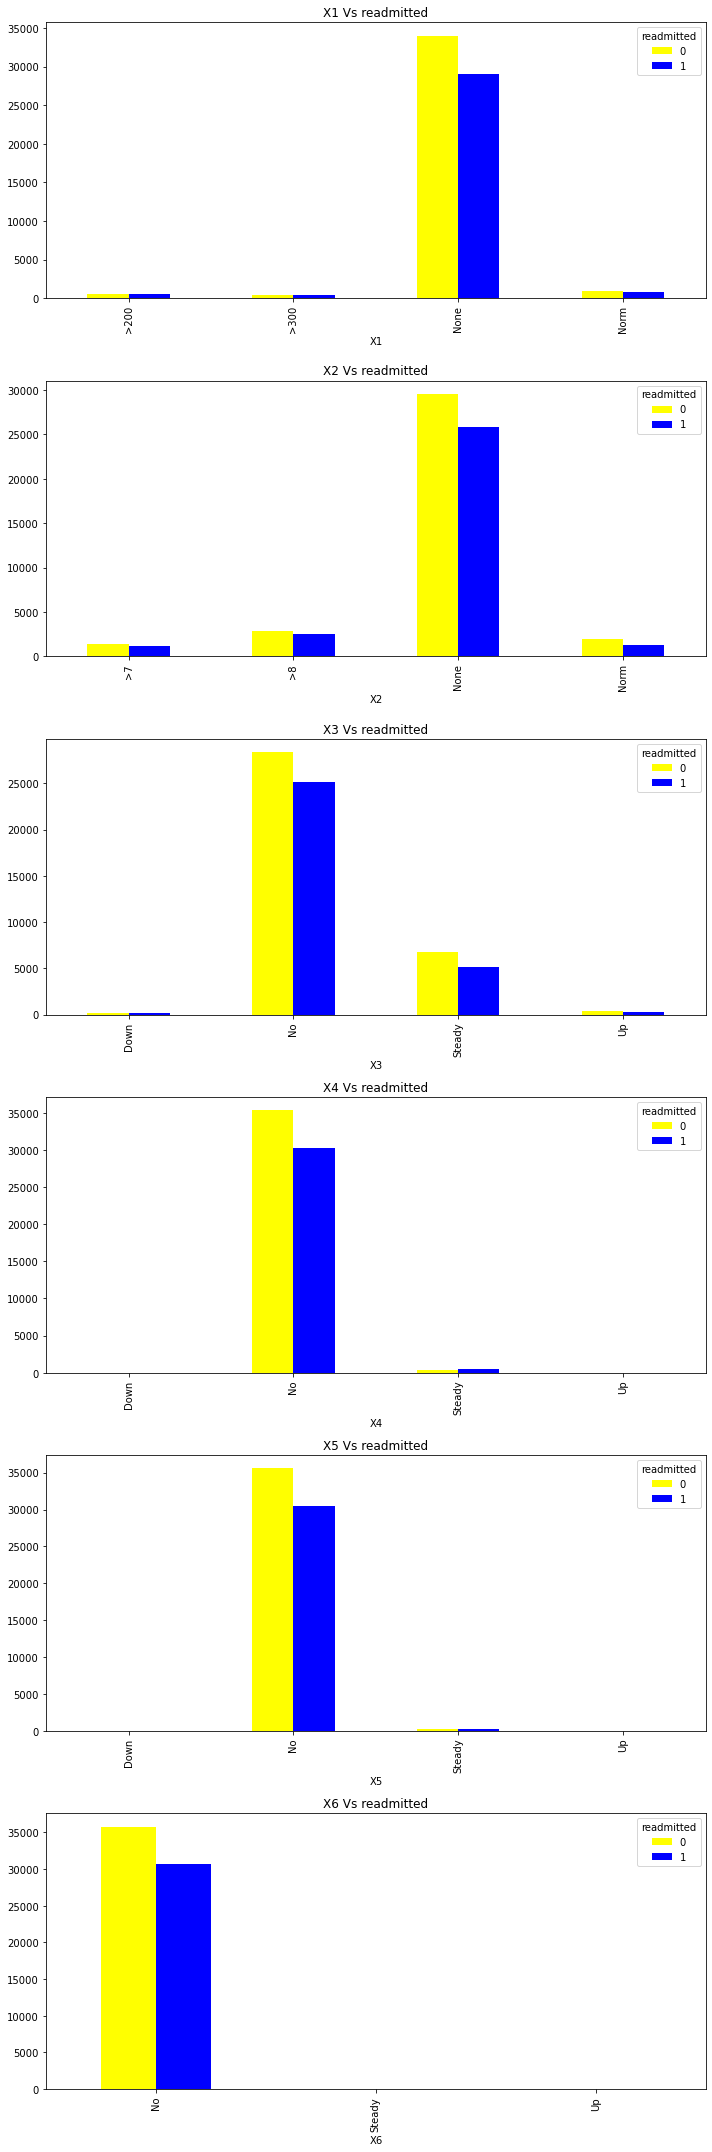

In [57]:
CategoricalColsList2 = ['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
]

plt.subplots_adjust(wspace = 0.8,hspace = 0.5)
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList2), ncols=1, figsize=(10,30))

#Creating Grouped bar plots for each categorical predictor against the Target Variable 'readmitted'
for PredictorCol , i in zip(CategoricalColsList2, range(len(CategoricalColsList2))):
    CrossTabResult=pd.crosstab(index=Readmission[PredictorCol], columns=Readmission['readmitted'])
    CrossTabResult.plot.bar(color=['yellow','blue'], ax=PlotCanvas[i], title=PredictorCol+' Vs '+'readmitted')
    fig.tight_layout()

In [58]:
FunctionChisq(inpData=Readmission, 
              TargetVariable='readmitted',
              CategoricalVariablesList= CategoricalColsList2)

X1 is correlated with readmitted | P-Value: 1.666040052135074e-07
X2 is correlated with readmitted | P-Value: 1.700527519805053e-11
X3 is correlated with readmitted | P-Value: 6.267430055640309e-15
X4 is correlated with readmitted | P-Value: 2.448267913312658e-06
X5 is NOT correlated with readmitted | P-Value: 0.17021797254359725
X6 is correlated with readmitted | P-Value: 0.012837554107868144


['X1', 'X2', 'X3', 'X4', 'X6']

In [59]:
CategoricalColsList3 = ['X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',]

FunctionChisq(inpData=Readmission, 
              TargetVariable='readmitted',
              CategoricalVariablesList= CategoricalColsList3)

X7 is NOT correlated with readmitted | P-Value: 0.06546353116456957
X8 is NOT correlated with readmitted | P-Value: 1.0
X9 is correlated with readmitted | P-Value: 6.020794744358099e-07
X10 is NOT correlated with readmitted | P-Value: 0.36024705921575556
X11 is NOT correlated with readmitted | P-Value: 0.9863845603986611
X12 is correlated with readmitted | P-Value: 0.038955541826926565
X13 is correlated with readmitted | P-Value: 0.0012042736542993437
X14 is correlated with readmitted | P-Value: 2.947706500365788e-05
X15 is NOT correlated with readmitted | P-Value: 0.3117016056818509
X16 is NOT correlated with readmitted | P-Value: 0.09756196292645992
X17 is correlated with readmitted | P-Value: 0.04475646207880666
X18 is NOT correlated with readmitted | P-Value: 1.0
X19 is NOT correlated with readmitted | P-Value: 1.0
X20 is correlated with readmitted | P-Value: 1.0432612729844596e-65
X21 is correlated with readmitted | P-Value: 0.035844757468783586
X22 is NOT correlated with readmitt

['X9', 'X12', 'X13', 'X14', 'X17', 'X20', 'X21']

In [60]:
CategoricalColsList4 = ['diag_1',
 'diag_2',
 'diag_3',
 'diag_4'] 

FunctionChisq(inpData=Readmission, 
              TargetVariable='readmitted',
              CategoricalVariablesList= CategoricalColsList4)

diag_1 is correlated with readmitted | P-Value: 1.6049391571279512e-241
diag_2 is correlated with readmitted | P-Value: 6.0982536493231976e-207
diag_3 is correlated with readmitted | P-Value: 7.611290974332619e-185
diag_4 is correlated with readmitted | P-Value: 7.611290974332619e-185


['diag_1', 'diag_2', 'diag_3', 'diag_4']

## Feature Engineering and Feature selection

In [61]:
len(Readmission[Readmission['diag_3']==Readmission['diag_4']])

66587

 From above we can see as diag_3 and diag_4 have same data for all rows hence dropping off one of them to avoid reducdancy

In [62]:
Readmission.drop('diag_4',axis = 1,inplace = True)

Creating a new feature 'diag_12' using diag_1 column values to get clarity on type of diagnosed diseases

In [63]:
# Step-1 : replacing string columns by some numbers to make the column uniform in data type
str_cols = ['diag_1','diag_2','diag_3']

for col in str_cols:
    Readmission[col] = Readmission[col].str.replace('E','50')
    Readmission[col]=Readmission[col].str.replace('V','22')
    Readmission[col]=Readmission[col].str.replace('NA','0')
    Readmission[col] = Readmission[col].astype(float)
    Readmission[col] = np.round(Readmission[col],0)

In [64]:
Readmission.dtypes

index                   int64
encounter_id          float64
patient_id            float64
race                   object
gender                 object
age                    object
time_in_hospital        int64
num_lab_procedures    float64
num_procedures          int64
num_medications       float64
number_inpatient        int64
diag_1                float64
diag_2                float64
diag_3                float64
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13                    object
X14                    object
X15                    object
X16                    object
X17                    object
X18       

In [65]:
Readmission['diag_1'].head(150)

0       783.0
1       564.0
2       574.0
3       401.0
4       311.0
        ...  
145     715.0
146     518.0
147     590.0
148    2257.0
149     648.0
Name: diag_1, Length: 150, dtype: float64

In [66]:
# Step-2 : mapping diagnosis codes with disease names
Readmission['diag_12'] = pd.cut(Readmission['diag_1'], bins=[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760
                                                             ,780,800,2200,50000, float('Inf')], 
                           labels=['Not defined-20', 'Infectious And Parasitic-00', 'Neoplasms-01','Endocrine, Nutritional And Metabolic,Immunal-02'
                                  ,'Blood disorders-03','Mental disorders-04','Nervous System And Sense Organs-05','Circulatory disorders-06',
                                  'Respiratory  disorders-07','Digestive disorders-08','Genitourinary disorders-09','Pregnancy, Childbirth, And The Puerperium-10'
                                  ,'Skin And Subcutaneous Tissue-11','Musculoskeletal System And Connective Tissu-12','Congenital Anomalies-13','Conditions Originating In The Perinatal Period-14',
                                 'Symptoms, Signs, And Ill-Defined Conditions-15','Injury And Poisoning-16','factors Influencing Health Status And Contact With Health Services-17',
                                  'External Causes Of Injury And Poisoning-18'])

In [67]:
#Step - 4 : Followed above method to create 'diag_23' and 'diag_34' respectively for 'diag_2' and 'diag_3' columns.

Readmission['diag_23'] = pd.cut(Readmission['diag_2'], bins=[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760
                                                             ,780,800,2200,50000, float('Inf')], 
                           labels=['Not defined-20', 'Infectious And Parasitic-00', 'Neoplasms-01','Endocrine, Nutritional And Metabolic,Immunal-02'
                                  ,'Blood disorders-03','Mental disorders-04','Nervous System And Sense Organs-05','Circulatory disorders-06',
                                  'Respiratory  disorders-07','Digestive disorders-08','Genitourinary disorders-09','Pregnancy, Childbirth, And The Puerperium-10'
                                  ,'Skin And Subcutaneous Tissue-11','Musculoskeletal System And Connective Tissu-12','Congenital Anomalies-13','Conditions Originating In The Perinatal Period-14',
                                 'Symptoms, Signs, And Ill-Defined Conditions-15','Injury And Poisoning-16','factors Influencing Health Status And Contact With Health Services-17',
                                  'External Causes Of Injury And Poisoning-18'])

In [68]:
Readmission['diag_34'] = pd.cut(Readmission['diag_3'], bins=[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760
                                                             ,780,800,2200,50000, float('Inf')], 
                           labels=['Not defined-20', 'Infectious And Parasitic-00', 'Neoplasms-01','Endocrine, Nutritional And Metabolic,Immunal-02'
                                  ,'Blood disorders-03','Mental disorders-04','Nervous System And Sense Organs-05','Circulatory disorders-06',
                                  'Respiratory  disorders-07','Digestive disorders-08','Genitourinary disorders-09','Pregnancy, Childbirth, And The Puerperium-10'
                                  ,'Skin And Subcutaneous Tissue-11','Musculoskeletal System And Connective Tissu-12','Congenital Anomalies-13','Conditions Originating In The Perinatal Period-14',
                                 'Symptoms, Signs, And Ill-Defined Conditions-15','Injury And Poisoning-16','factors Influencing Health Status And Contact With Health Services-17',
                                  'External Causes Of Injury And Poisoning-18'])

In [69]:
# Check if above mapping working fine
Readmission.loc[340,['diag_12','diag_23','diag_34']]

diag_12                          Respiratory  disorders-07
diag_23                           Circulatory disorders-06
diag_34    Endocrine, Nutritional And Metabolic,Immunal-02
Name: 340, dtype: object

In [70]:
# Replacing NA columns of diag_12 by 'Not-defined 20'
Readmission = Readmission.fillna('Not defined-20')


In [71]:
#dropping off diag_1,diag_2,diag_3 to avoid redundancy
Readmission.drop(['diag_1','diag_2','diag_3'],axis =1,inplace = True)

In [72]:
Readmission.dtypes

index                    int64
encounter_id           float64
patient_id             float64
race                    object
gender                  object
age                     object
time_in_hospital         int64
num_lab_procedures     float64
num_procedures           int64
num_medications        float64
number_inpatient         int64
diag_5                 float64
number_diagnoses         int64
X1                      object
X2                      object
X3                      object
X4                      object
X5                      object
X6                      object
X7                      object
X8                      object
X9                      object
X10                     object
X11                     object
X12                     object
X13                     object
X14                     object
X15                     object
X16                     object
X17                     object
X18                     object
X19                     object
X20     

Creating a new feature 'dosechange' to signify the number of dose changed from X1 TO X25

In [73]:
cols = ['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25']

for i in cols:
    colname = str(i) + 'new'
    Readmission[colname] = Readmission[i].apply(lambda x: 0 if (x == 'No' or x == 'Steady' or x =='None' or x == 'Norm') else 1)
Readmission['dosechange'] = 0
for i in cols:
    colname = str(i) + 'new'
    Readmission['dosechange'] = Readmission['dosechange'] + Readmission[colname]
    del Readmission[colname]
    
Readmission['dosechange'].value_counts()  

0    42745
1    19108
2     4363
3      338
4       28
5        5
Name: dosechange, dtype: int64

In [74]:
#dropping off older columns to avoid redundancy
Readmission.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25'],axis = 1,inplace = True)

In [75]:
# check data type information on final predictors
Readmission.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               66587 non-null  int64   
 1   encounter_id        66587 non-null  float64 
 2   patient_id          66587 non-null  float64 
 3   race                66587 non-null  object  
 4   gender              66587 non-null  object  
 5   age                 66587 non-null  object  
 6   time_in_hospital    66587 non-null  int64   
 7   num_lab_procedures  66587 non-null  float64 
 8   num_procedures      66587 non-null  int64   
 9   num_medications     66587 non-null  float64 
 10  number_inpatient    66587 non-null  int64   
 11  diag_5              66587 non-null  float64 
 12  number_diagnoses    66587 non-null  int64   
 13  change              66587 non-null  object  
 14  diabetesMed         66587 non-null  object  
 15  readmitted          66587 non-null  

In [76]:
# Converting the binary nominal variables race,gender,age,change,diabetesMed to numeric
Readmission['race'].replace({'Hispanic':0,'Caucasian':1,'AfricanAmerican':2,'Asian':3,'Other':4,'NA':5},inplace = True)
Readmission['gender'].replace({'Male':0,'Female':1,'Unknown/Invalid':2},inplace = True)
Readmission['age'].replace({'[0-40)':0,'[40-50)':1,'[50-60)':2,'[60-70)':3,'[70-80)':4,'[80-90)':5,'[90-100)':6},inplace = True)
Readmission['change'].replace({'Ch':1,'No':0},inplace = True)
Readmission['diabetesMed'].replace({'No':0,'Yes':1},inplace = True)

In [77]:
Readmission.head()

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_5,number_diagnoses,change,diabetesMed,readmitted,diag_12,diag_23,diag_34,dosechange
0,69375,14036.706879,7177.878517,0,0,5,4,6.244998,1,3.000000,2,32.970966,9,0,1,1,"Symptoms, Signs, And Ill-Defined Conditions-15",Circulatory disorders-06,Genitourinary disorders-09,0
1,57272,12789.524854,9624.518533,1,0,3,3,5.830952,1,3.464102,0,94.116731,6,0,0,0,Digestive disorders-08,"Symptoms, Signs, And Ill-Defined Conditions-15",Digestive disorders-08,0
2,82347,16015.535146,5479.414385,1,1,2,6,7.071068,2,4.898979,2,64.138297,9,1,1,1,Digestive disorders-08,Circulatory disorders-06,Genitourinary disorders-09,1
3,89608,17026.191941,9675.020465,2,1,4,5,7.937254,0,3.741657,0,13.832428,7,1,1,1,Circulatory disorders-06,"Symptoms, Signs, And Ill-Defined Conditions-15","Endocrine, Nutritional And Metabolic,Immunal-02",1
4,24091,9048.419752,4843.995871,1,0,4,8,4.123106,1,3.316625,0,82.898368,9,0,0,1,Mental disorders-04,"Endocrine, Nutritional And Metabolic,Immunal-02",Mental disorders-04,1


In [78]:
# Extracting numbers from string columns and conveting them to integer
Readmission['diag_12'] = Readmission['diag_12'].str[-2:]
Readmission['diag_23'] = Readmission['diag_23'].str[-2:]
Readmission['diag_34'] = Readmission['diag_34'].str[-2:]

In [79]:
Readmission['diag_12'] = Readmission['diag_12'].astype(int)
Readmission['diag_23'] = Readmission['diag_23'].astype(int)
Readmission['diag_34'] = Readmission['diag_34'].astype(int)

In [80]:
Readmission.dtypes

index                   int64
encounter_id          float64
patient_id            float64
race                    int64
gender                  int64
age                     int64
time_in_hospital        int64
num_lab_procedures    float64
num_procedures          int64
num_medications       float64
number_inpatient        int64
diag_5                float64
number_diagnoses        int64
change                  int64
diabetesMed             int64
readmitted              int64
diag_12                 int32
diag_23                 int32
diag_34                 int32
dosechange              int64
dtype: object

In [81]:
# standardizing data for better prediction power of model
def standardize(data):
    return ((data - np.mean(data, axis = 0)) / np.std(data, axis = 0))

In [82]:
new_num_cols = ['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_inpatient','diag_5', 'number_diagnoses','change',
       'diabetesMed','dosechange','diag_12','diag_23','diag_34']

Readmission[new_num_cols] = standardize(Readmission[new_num_cols])

Readmission[new_num_cols].dtypes

index                 float64
encounter_id          float64
patient_id            float64
race                  float64
gender                float64
age                   float64
time_in_hospital      float64
num_lab_procedures    float64
num_procedures        float64
num_medications       float64
number_inpatient      float64
diag_5                float64
number_diagnoses      float64
change                float64
diabetesMed           float64
dosechange            float64
diag_12               float64
diag_23               float64
diag_34               float64
dtype: object

In [83]:
Readmission.shape

(66587, 20)

In [84]:
Readmission.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_inpatient', 'diag_5', 'number_diagnoses',
       'change', 'diabetesMed', 'readmitted', 'diag_12', 'diag_23', 'diag_34',
       'dosechange'],
      dtype='object')

#### Final selected  predictors for model building:
['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_inpatient', 'diag_5', 'number_diagnoses',
       'change', 'diabetesMed', 'diag_12', 'diag_23', 'diag_34',
       'dosechange']
       
#### Target Variable : 'readmitted'

#### Final selected predictors for ML model

In [85]:
['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age', 'time_in_hospital',
 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'diag_5', 'number_diagnoses',
 'change', 'diabetesMed', 'diag_12', 'diag_23', 'diag_34', 'dosechange']

['index',
 'encounter_id',
 'patient_id',
 'race',
 'gender',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_inpatient',
 'diag_5',
 'number_diagnoses',
 'change',
 'diabetesMed',
 'diag_12',
 'diag_23',
 'diag_34',
 'dosechange']

In [93]:
final_pred = ['encounter_id', 'patient_id', 'race', 'gender', 'age', 'time_in_hospital',
 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'diag_5', 'number_diagnoses',
 'change', 'diabetesMed', 'diag_12', 'diag_23', 'diag_34', 'dosechange'
 ]



dataforml = Readmission[final_pred]
dataforml.head()

,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_5,number_diagnoses,change,diabetesMed,diag_12,diag_23,diag_34,dosechange
0,0.449191,0.152183,-1.653818,-1.083998,1.247345,-0.038115,-0.085291,-0.194357,-0.912505,2.066656,-0.579685,0.821180,-0.924717,0.548088,1.692964,-0.102698,0.523126,-0.676636
1,0.150838,0.964086,-0.397598,-1.083998,-0.083717,-0.469012,-0.339966,-0.194357,-0.428203,-0.656132,1.538675,-0.739067,-0.924717,-1.824525,0.106142,2.086589,0.310013,-0.676636
2,0.922569,-0.411443,-0.397598,0.922288,-0.749249,0.823678,0.422816,0.391901,1.069128,2.066656,0.500089,0.821180,1.081412,0.548088,0.106142,-0.102698,0.523126,0.877794
3,1.164340,0.980845,0.858623,0.922288,0.581814,0.392781,0.955598,-0.780615,-0.138567,-0.656132,-1.242729,-0.218985,1.081412,0.548088,-0.347235,2.086589,-0.968668,0.877794
4,-0.744115,-0.622303,-0.397598,-1.083998,0.581814,1.685472,-1.390444,-0.194357,-0.582099,-0.656132,1.150021,0.821180,-0.924717,-1.824525,-0.800613,-1.075715,-0.542441,0.877794


In [94]:
# Separate Target Variable and Predictor Variables
TargetVariable='readmitted'
Predictors=dataforml.columns

X=dataforml[Predictors].values
y=Readmission[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Model Building

In [95]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=3,penalty='l1', solver='liblinear',random_state = 0)

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=LR.fit(X_train,y_train)
prediction=LOG.predict(X_test)
prediction_prob = LOG.predict_proba(X_test)
print(prediction_prob)
#Train score
print("Train score :",LOG.score(X_train,y_train))
#Test score
print("Test score :",LOG.score(X_test,y_test))

[[0.45321711 0.54678289]
 [0.70601266 0.29398734]
 [0.64269568 0.35730432]
 ...
 [0.3117421  0.6882579 ]
 [0.51657522 0.48342478]
 [0.5745319  0.4254681 ]]
Train score : 0.6264750053636559
Test score : 0.6217650297842519


#### From above we can see that both Train and Test score are lower in range so this model can be classified as an 'Underfit' model

In [97]:
# Measuring accuracy on Testing Data using F1 score
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.62      0.77      0.68     10608
           1       0.63      0.46      0.53      9369

    accuracy                           0.62     19977
   macro avg       0.62      0.61      0.61     19977
weighted avg       0.62      0.62      0.61     19977

[[8146 5094]
 [2462 4275]]
Accuracy of the model on Testing Sample Data: 0.61

Accuracy values for 10-fold Cross Validation:
 [0.62729381 0.60876102 0.614413   0.62517346 0.62290802 0.61583659
 0.61445691 0.60737376 0.61047941 0.60888537]

Final Average Accuracy of the model: 0.62


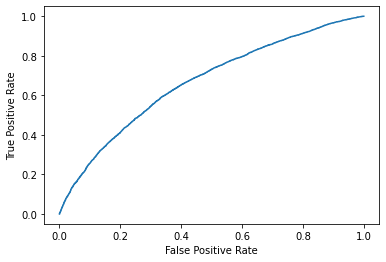

AUC= 0.667


In [98]:
# roc-auc curve
prediction_proba = LOG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prediction_proba)
auc = metrics.roc_auc_score(y_test, prediction_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("AUC=",round(auc,3))

In [99]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     10608
           1       0.64      0.42      0.51      9369

    accuracy                           0.62     19977
   macro avg       0.63      0.61      0.60     19977
weighted avg       0.62      0.62      0.60     19977

[[8425 2183]
 [5431 3938]]
Accuracy of the model on Testing Sample Data: 0.6

Accuracy values for 10-fold Cross Validation:
 [0.62156432 0.59811937 0.60502984 0.61513126 0.60935079 0.59983231
 0.60569975 0.60017839 0.60188972 0.60205223]

Final Average Accuracy of the model: 0.61


### Check for multi-collinearity in final predictors and removing whose VIF > 5

In [100]:
#Checking Multicollinearity of selected predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()

vif_data["feature"] = Predictors

vif_data["VIF"] = [variance_inflation_factor(dataforml[Predictors].values, i)
                          for i in range(len(Predictors))]
print(vif_data)

               feature       VIF
0         encounter_id  1.563418
1           patient_id  1.502975
2                 race  1.020406
3               gender  1.012823
4                  age  1.094085
5     time_in_hospital  1.432877
6   num_lab_procedures  1.160791
7       num_procedures  1.199145
8      num_medications  1.682044
9     number_inpatient  1.041843
10              diag_5  1.000879
11    number_diagnoses  1.290054
12              change  1.809501
13         diabetesMed  1.367672
14             diag_12  1.020919
15             diag_23  1.016470
16             diag_34  1.006975
17          dosechange  1.494742


Removed 'index' column from final predictor list due to its VIF of 36 and re-ran the model